In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
page = requests.get("https://www.bcm.mr/historique-change.html")
soup = BeautifulSoup(page.content , 'html.parser')

In [14]:
def get_link(a):
    link = "https://www.bcm.mr" + a
    return link 

In [4]:
def get_xrate_day(page_link):
    page = requests.get(page_link)
    soup = BeautifulSoup(page.content, 'html.parser')
    div_box = soup.find_all('div', class_='templatemo_boxc')
    div_box[0].find('h2').text
    table = div_box[0].find_all('div', class_='rTable')[0].find_all('div', class_='rTableRow')
    listd=[]
    for x in table:
        d={}
        d["date"] =  div_box[0].find('h2').text.split(" ")[4]
        #div_box[0].find('h2').text.split(" ")[8]
        tmp = x.find_all('div', class_='rTableCellc')
        if (len(tmp) == 2):
            d['quantity'] = tmp[0].text
            cur_code = tmp[1].text
            tmp = x.find_all('div', class_='rTableCellca')
            if (len(tmp) == 2):
                buy_price = tmp[0].text
                sell_price = tmp[1].text
                d['currency']=cur_code
                d['buy']=buy_price
                d['sell']=sell_price
                listd.append(d)
    return pd.DataFrame(listd)

In [5]:
def get_changes(link) :
    page = requests.get(link)
    soup = BeautifulSoup(page.content , 'html.parser') 
    vm =list( map(lambda x : x.get('href') , soup.find_all('a' , href = True )))
    change_pages =  list(filter(lambda x : x.startswith("/cours-change.html?"),vm))
    return change_pages

In [7]:
changes = get_changes("https://www.bcm.mr/historique-change.html")

In [16]:
list_changes = list(map(get_link,changes ))

In [23]:
data = pd.DataFrame(columns = ["date","quantity","currency", "buy" ,"sell"])
#data.columns = ["date","quantity","currency", "buy" ,"sell"]
data.head()

,date,quantity,currency,buy,sell


In [29]:
data = pd.DataFrame(columns = ["date","quantity","currency", "buy" ,"sell"])
i = 0
for link in  list_changes :
    data = pd.concat([data,get_xrate_day(link)],axis = 0,ignore_index=True)
    i += 1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [36]:
data

,date,quantity,currency,buy,sell
0,28/12/2022,1,EUR,"39,03","39,42"
1,28/12/2022,1,USD,"36,68","37,05"
2,28/12/2022,1,GBP,"44,28","44,72"
3,28/12/2022,100,CHF,"3952,8","3992,43"
4,28/12/2022,1,CAD,"27,15","27,42"
...,...,...,...,...,...
359,14/11/2022,100,MAD,"351,39","354,91"
360,14/11/2022,1000,JPY,"268,3","270,99"
361,14/11/2022,1,TND,"12,02","12,14"
362,14/11/2022,1,DZD,"0,27","0,27"


In [35]:
data["date"].apply(pd.to_datetime)

C:\Users\pro\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\apply.py:1143: UserWarning: Parsing '28/12/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mapped = lib.map_infer(
C:\Users\pro\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\apply.py:1143: UserWarning: Parsing '27/12/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mapped = lib.map_infer(
C:\Users\pro\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\apply.py:1143: UserWarning: Parsing '26/12/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mapped = lib.map_infer(
C:\Users\pro\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\apply.py:1143: UserWarning: Parsing '22/12/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format

0     2022-12-28
1     2022-12-28
2     2022-12-28
3     2022-12-28
4     2022-12-28
         ...    
359   2022-11-14
360   2022-11-14
361   2022-11-14
362   2022-11-14
363   2022-11-14
Name: date, Length: 364, dtype: datetime64[ns]

In [37]:
import seaborn as sns

In [38]:
data_usd = data[data["currency"]== 'USD']

<AxesSubplot:xlabel='date', ylabel='buy'>

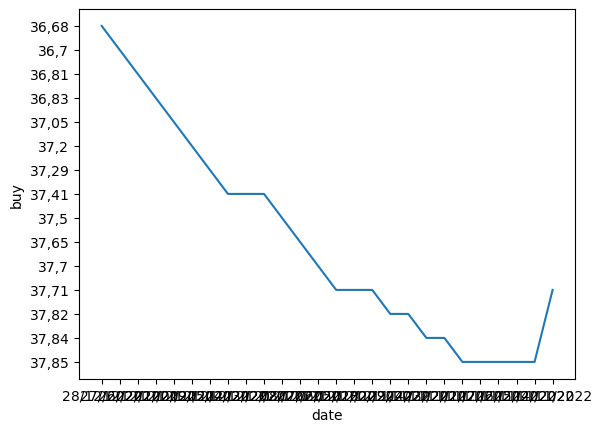

In [39]:
sns.lineplot(x = "date", y = "buy",
             data = data_usd)

<AxesSubplot:xlabel='date', ylabel='sell'>

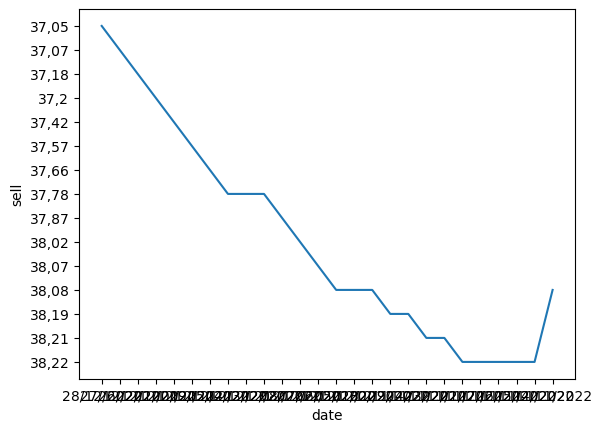

In [41]:
sns.lineplot(x = "date", y = "sell",
             data = data_usd)